In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

# Káosz (Chua-áramkörös megvalósítással)

# 1. feladat: Ismerkedés a kapcsolással - 6 pont

A rendszer kontroll paramétere egy változtatható ellenállás. Ennek aktuális értékének mérésére használja az asztali `DVM`-et úgy, hogy az `Ell_meres` kapcsolót megfelelő állásba billenti. *Megjegyzés:* Az ellenállás mérés során természetesen az áramkör nem oszcillál tovább, a további viselkedés tanulmányozásához ne felejtse visszakapcsolni az ellenállást az áramkörbe.

Kösse be a két csatornás oszcilloszkópot a _Chua-kapcsolás_ két kondenzátorának erősített kimenetére. Vizsgálja meg a jelek időfejlődését. Hosszabb jelalakok rögzítésére használja az `audacity` programot. Amennyiben a jel túlvezérelt a bemeneti előerősítést szoftverből csökkentheti. Rövidebb mintavételre az oszcilloszkópot is használhatja.

_Figyelmeztetés:_ a mérés során keletkező fájljait ne felejtse a jegyzőkönyv mellé feltölteni!

## 1. 1. Az áramkör működésének különböző fázisai

Azonosítsuk a legfontosabb tartományokat:
* periodikus tartomány,
* periodus kettőződés,
* kaotikus viselkedés,
* _double-scroll_ folyamat.

Ezekről készítsen ábrákat.

Minden mérést audacityvel készítettem, az eredményeket wavfile formátumokban elmentettem és feltöltöttem a jegyzőkönyv mellé

# Ábrák

In [2]:
from scipy.io import wavfile
fs_pk, data_pk = wavfile.read('perkis1.95khm.wav')
fs_pn, data_pn = wavfile.read('pernagy1.50kohm.wav')
fs_1fszk, data_1fszk = wavfile.read('1fszkis1.85khm.wav')
fs_2fszk, data_2fszk = wavfile.read('2fszkis1.84khm.wav')
fs_dskis, data_dskis = wavfile.read('dskis1.80kohm.wav')
fs_kaotkis, data_kaotkis = wavfile.read('kaotkis1.82khm.wav')
fs_1_55, data_1_55 = wavfile.read('1.55kohm.wav')
fs_1_61, data_1_61 = wavfile.read('1.61kohm.wav')
fs_1_69, data_1_69 = wavfile.read('1.69kohm.wav')
fs_1_74, data_1_74 = wavfile.read('1.74kohm.wav')
fs_1_89, data_1_89 = wavfile.read('1.89kohm.wav')

In [3]:
fs=44100 #mindegyik mérésnél azonos, ennyi mérés történik másodpercenként, tehát a mérési idő egy mérésnél: len(data[i])/fs
data=np.array([data_pn,data_1_55,data_1_61,data_1_69,data_1_74,data_dskis,data_kaotkis,data_2fszk,data_1fszk,data_1_89,data_pk])
kOhm=np.array([1.50,1.55,1.61,1.69,1.74,1.80,1.82,1.84,1.85,1.89,1.95])

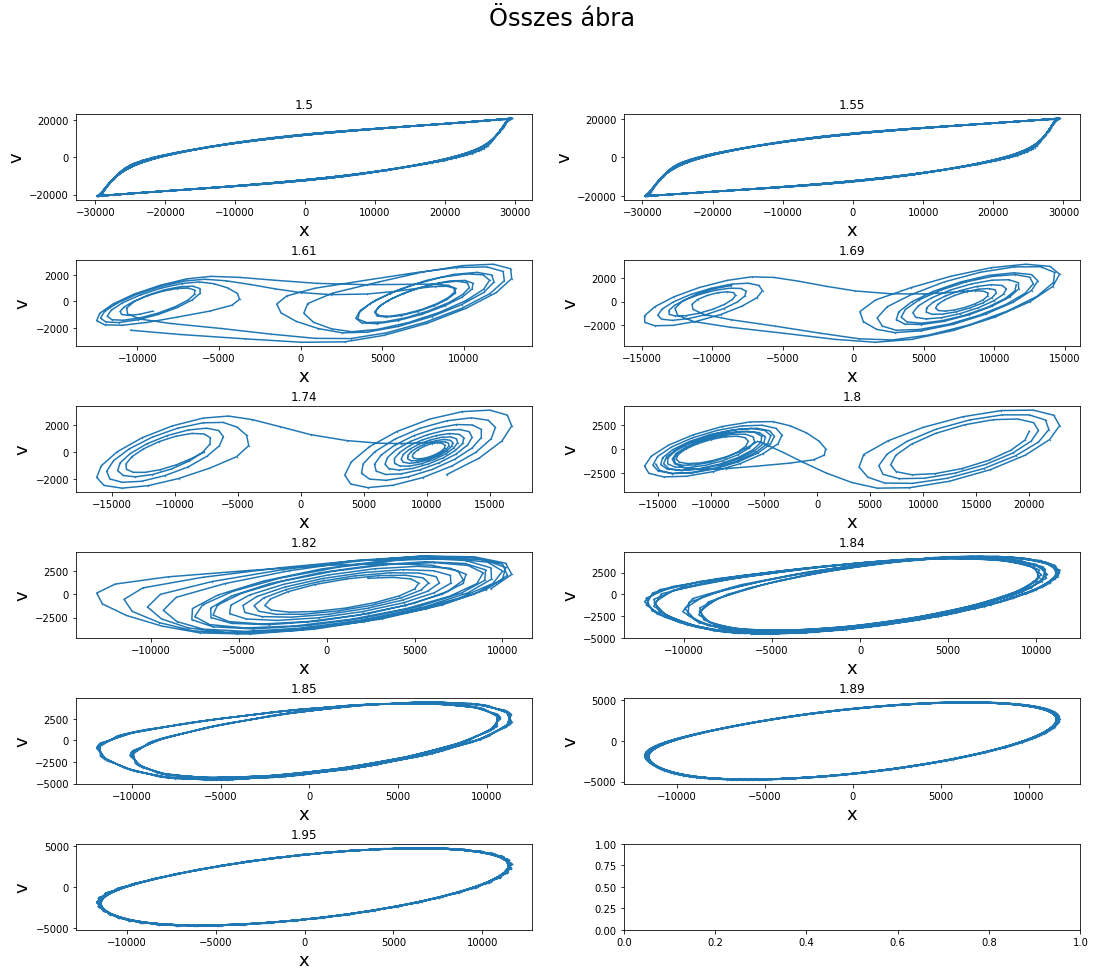

In [4]:
def multiabra(data,kOhm,title):
    f, axs = plt.subplots(len(data)//2+len(data)%2,2,figsize=(18,15))
    f.subplots_adjust(hspace = 0.7, wspace=.2)
    f.suptitle(title,fontsize=24)
    axs = axs.ravel()
    for i in range(len(data)):
        matplotlib.tight_layout
        axs[i].plot(data[i][:200,0],data[i][:200,1],label="mért pontok",marker='.',markersize=1)
        axs[i].title.set_text('{}'.format(kOhm[i]))
        axs[i].set_xlabel("x",fontsize=18)
        axs[i].set_ylabel("v",fontsize=18)
        #axs[i].legend()
multiabra(data,kOhm,"Összes ábra")

Text(0,0.5,'v')

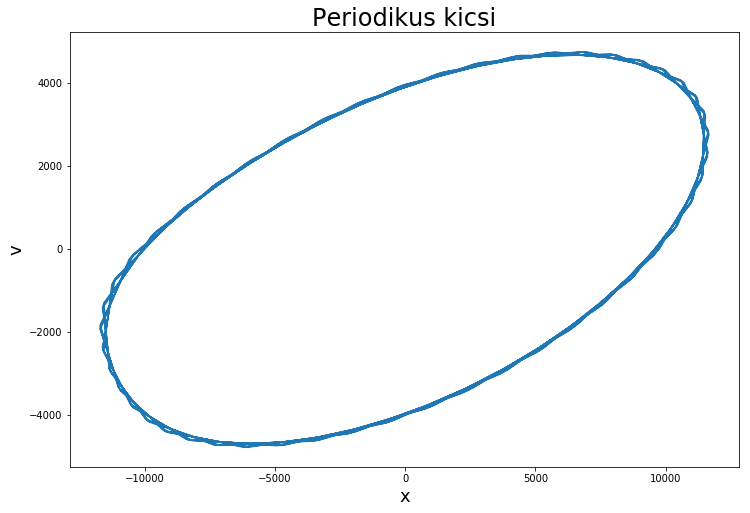

In [5]:
plt.figure(figsize=(12,8))
plt.plot(data_pk[:200,0],data_pk[:200,1])
plt.title('Periodikus kicsi',fontsize=24)
plt.xlabel("x",fontsize=18)
plt.ylabel("v",fontsize=18)

Text(0,0.5,'v')

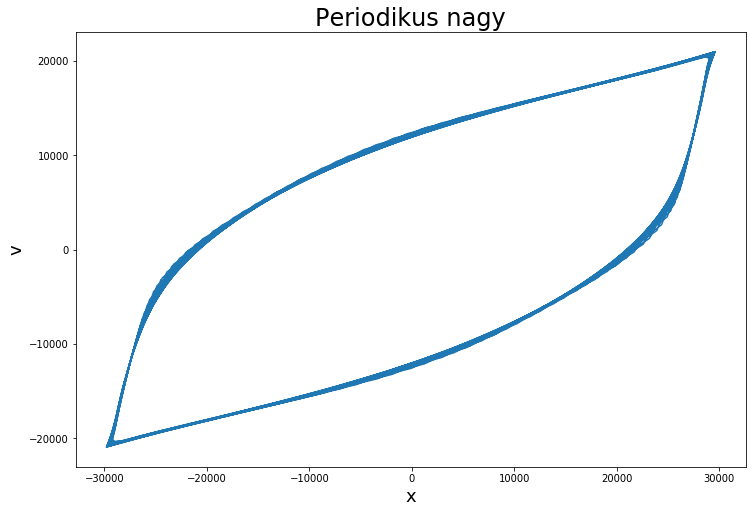

In [6]:
plt.figure(figsize=(12,8))
plt.plot(data_pn[:200,0],data_pn[:200,1])
plt.title('Periodikus nagy',fontsize=24)
plt.xlabel("x",fontsize=18)
plt.ylabel("v",fontsize=18)

Text(0,0.5,'v')

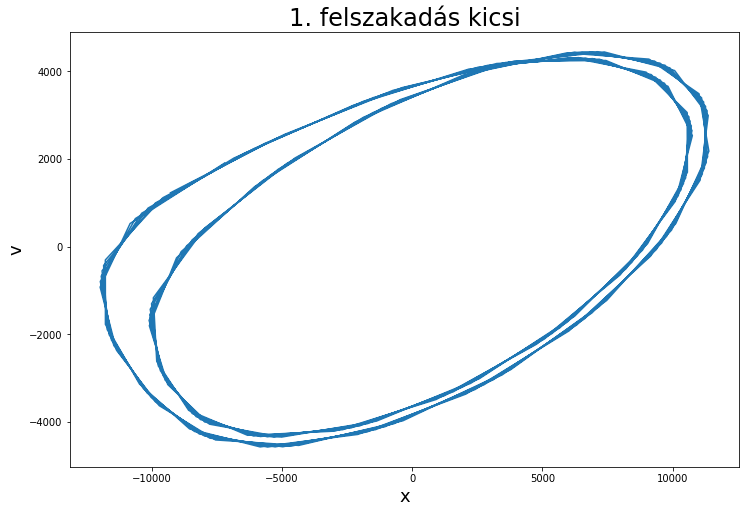

In [7]:
plt.figure(figsize=(12,8))
plt.plot(data_1fszk[:200,0],data_1fszk[:200,1])
plt.title('1. felszakadás kicsi',fontsize=24)
plt.xlabel("x",fontsize=18)
plt.ylabel("v",fontsize=18)

Text(0,0.5,'v')

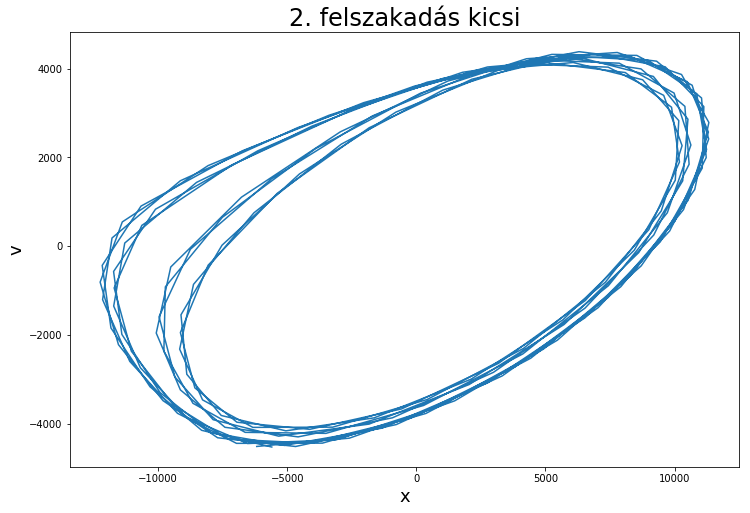

In [8]:
plt.figure(figsize=(12,8))
plt.plot(data_2fszk[:200,0],data_2fszk[:200,1])
plt.title('2. felszakadás kicsi',fontsize=24)
plt.xlabel("x",fontsize=18)
plt.ylabel("v",fontsize=18)

Text(0,0.5,'v')

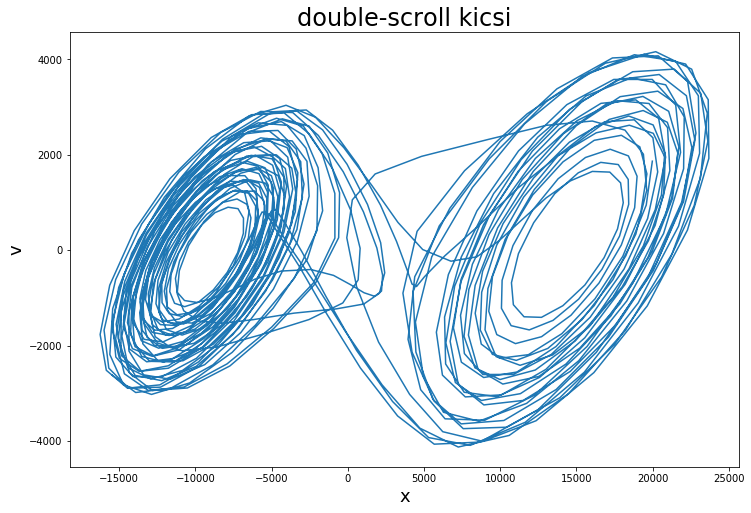

In [9]:
plt.figure(figsize=(12,8))
plt.plot(data_dskis[:1000,0],data_dskis[:1000,1])
plt.title('double-scroll kicsi',fontsize=24)
plt.xlabel("x",fontsize=18)
plt.ylabel("v",fontsize=18)

Text(0,0.5,'v')

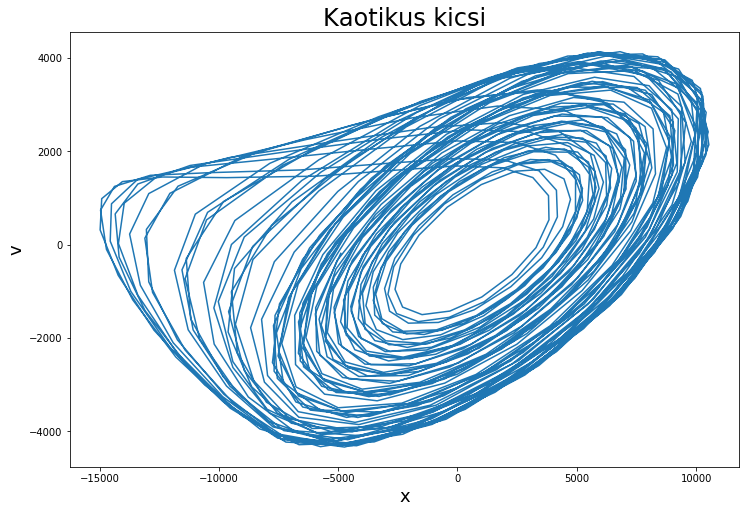

In [10]:
plt.figure(figsize=(12,8))
plt.plot(data_kaotkis[:1000,0],data_kaotkis[:1000,1])
plt.title('Kaotikus kicsi',fontsize=24)
plt.xlabel("x",fontsize=18)
plt.ylabel("v",fontsize=18)

## 2. feladat: A kapcsolás karakterisztikájának vizsgálata

### 2.1. A lineáris elemek karakterisztikája - 4 pont

Gerjessze impulzussorozattal vagy tapogassa le különböző frekvenciájú $\sin$ jelalakkal a lineáris elemeket. Állapítsa meg a rendszerre jellemző két karakterisztikus időt és a csillapítást.

In [11]:
MERES21 = np.genfromtxt('MERES2.1.dat')
MERES22a = np.genfromtxt('MERES2.2a.dat')
MERES22b = np.genfromtxt('MERES2.2b.dat')

In [12]:
xmax=np.array([MERES21[2011,0],MERES21[2038,0],MERES21[2063,0]]) #próbálgattam, melyek a legjobb pontok
ymax=np.array([MERES21[2011,2],MERES21[2038,2],MERES21[2063,2]])

def lecsenges(x,C,A=-3.992,B=0.696,D=0.00002011):
    return A+B*math.e**(C*(x-D))

#A=-3.992 #alapvonal
#B=0.696 #1. csúcs magasságából és az eltolásból (1.csúcs helye-A)
#D=0.00002011 #1. csúcs helye
#C kezdeti értékének kiszámítása
x0=0
x1=MERES21[2038,0]-MERES21[2011,0]
y0=(MERES21[2011,2]+3.992)/0.696
y1=(MERES21[2038,2]+3.992)/0.696
print(x0,x1,y0,y1)
C=math.log(0.08045977)/2.7e-07
popt,pcov=curve_fit(lecsenges,xmax,ymax,p0=[C]) # A p0-ba egyszeruen felsoroljuk a becsult ertekeket)
perr = np.sqrt(np.diag(pcov))      # az illesztési paraméterek hibáinak meghatározása
#Ebből a karakterisztikus idő:
tau=-1/popt[0]
print("A karakterisztikus idő tau={} s, hibája {} s".format(tau,perr[0]/popt[0]**2))

0 2.700000000000025e-07 1.0000000000000002 0.08045977011494261
A karakterisztikus idő tau=1.0749729168916744e-07 s, hibája 1.3302082269800811e-09 s


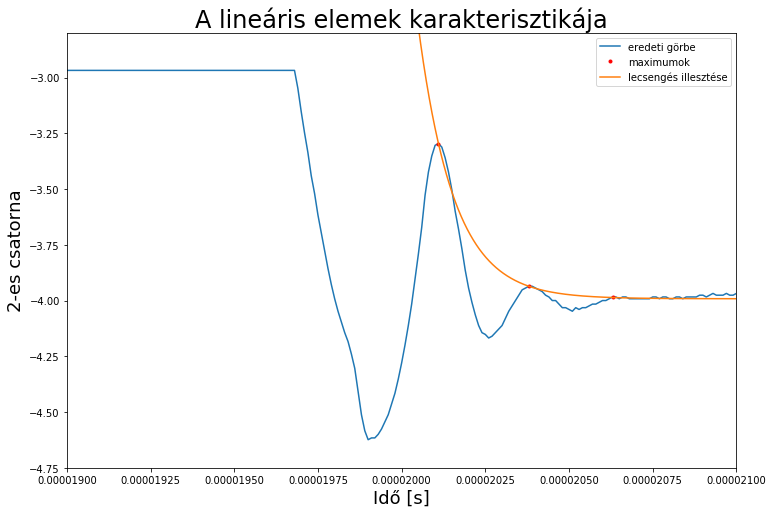

In [13]:
xmax=np.array([MERES21[2011,0],MERES21[2038,0],MERES21[2063,0]]) #próbálgattam, melyek a legjobb pontok
ymax=np.array([MERES21[2011,2],MERES21[2038,2],MERES21[2063,2]])
plt.figure(figsize=(12,8))
#plt.plot(MERES21[:,0],MERES21[:,1])
plt.plot(MERES21[:,0],MERES21[:,2],label='eredeti görbe')
plt.plot(xmax,ymax,'.',color='r',label='maximumok')
xsok=np.linspace(0.000019,0.000021,10000)
plt.plot(xsok,lecsenges(xsok,C),label='lecsengés illesztése')
plt.ylim(-4.75,-2.8)
plt.xlim(0.000019,0.000021)
plt.xlabel('Idő [s]',fontsize=18)
plt.ylabel('2-es csatorna',fontsize=18)
plt.title('A lineáris elemek karakterisztikája',fontsize=24)
plt.legend()

### 2.2. A nemlineáris elem karakterisztikája - 4 pont

Mérje ki az áram-feszültség karakterisztikát. Vizsgálja meg, hogy ez a karakterisztika függ-e a frekvenciától.

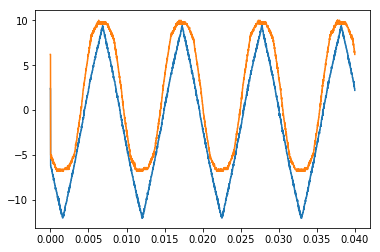

In [14]:
plt.plot(MERES22a[:,0],MERES22a[:,1])
plt.plot(MERES22a[:,0],MERES22a[:,2])

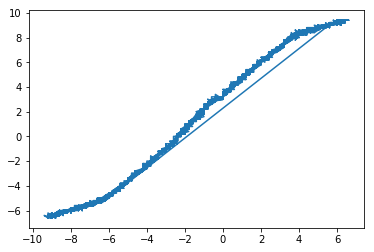

In [15]:
#plt.plot(MERES22b[:,0],MERES22b[:,1])
plt.plot(MERES22b[:,1],MERES22b[:,2])

## 3. feladat: Az ellenállás mint kontroll paraméter

Ezeket a feladatokat a kontroll paraméter lépésenkénti változtatása mellett kell elvégezni. Az ellenállás méréséhez használja azt a kapcsolót, ami a változtatható ellenállást leválasztja az áramkörről, és a DVM-re kapcsolja. 

### 3.1. Bifurkációs pontok felvétele - 3 pont

Határozza meg a bifurkációs pontokhoz tartozó $R_k$ értékeket! 

Hányad rendig tudja szemmel követni a bifurkációs pontokat?

Teljesül a Feigenbaum-féle

$$ \lim_{k\rightarrow\infty}\frac{R_k-R_{k-1}}{R_{k+1}-R_k}=\delta\approx 4{,}6692... $$

összefüggés?

In [16]:
#Csak az első a kisebb gyűrű esetén, és csak második rendig tudtam követni a bifurkációs pontokat
R1=85 #kOhm
R2=84 #kOhm
R3=83.5 #kOhm ; Ez már kitalált adat, a mérés alapján úgy láttam, hogy nagyjából ott lenne a következő,
#de az ellenállás finomhangolás nem működött, a kapcsoló pedig érintkezőhibás volt és "mászott" a jel,
#ezért ezt már nem sikerült lemérnem
delta=(R2-R1)/(R3-R2)
print("A Feigenbaum-féle szekvencia konstans értéke: delta={}".format(delta))
print("Ez persze eltér a valós értéktől, mert csak az 1,2,3 rendű felszakadásokat írtuk a képletbe, holott k->\inf kéne.")

A Feigenbaum-féle szekvencia konstans értéke: delta=2.0
Ez persze eltér a valós értéktől, mert csak az 1,2,3 rendű felszakadásokat írtuk a képletbe, holott k->\inf kéne.


### 3.2. Bifurkációs diagramm felvétele - 6 pont

A kontroll paraméter lépésenkénti változtatása mellett készítsük el a rendszer bifurkációs diagramját. 

* Magyarázza el kvalitatíven miért jelenik meg oszcilláció, miért mozdul ki a rendszer a triviális fixpontjából?
* Mit tapasztal, követi a kaotikus tartományt újabb periodikus szakasz?
* Megjelenik intermittens viselkedés?
* Mérjük meg a kontroll paraméter függvényében a spektrumot. Határozzuk meg a fő csúcsokat! Hogyan változik ez a kontroll paraméter függvényében?

A kaotikus tartományt követi újabb periodikus szakasz

Megjelenik intermittens viselkedés, plédául 1.8 kOhm-nál. Itt a jel két, majdnem periodikus gyűrű között ugrál bizonyos időközönként

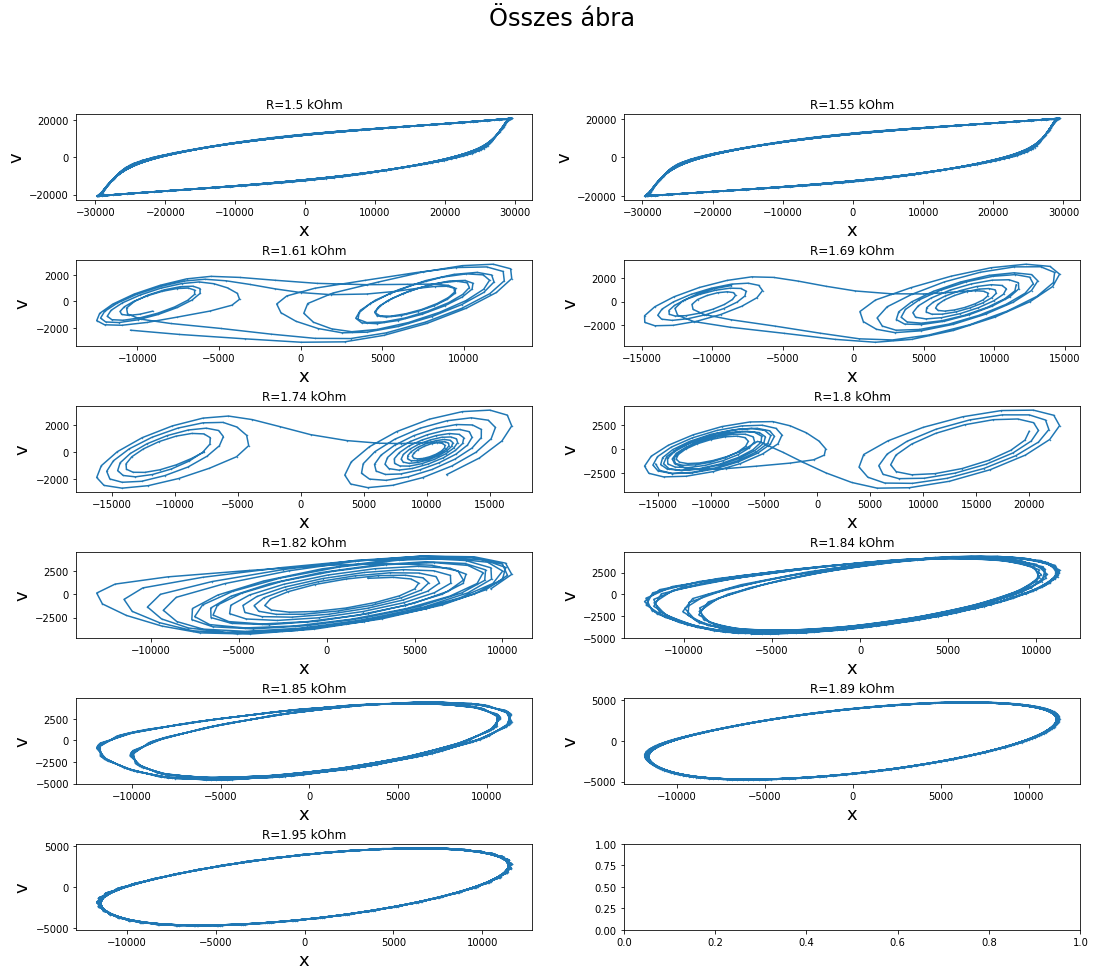

In [17]:
def multiabra(data,kOhm,title):
    f, axs = plt.subplots(len(data)//2+len(data)%2,2,figsize=(18,15))
    f.subplots_adjust(hspace = 0.7, wspace=.2)
    f.suptitle(title,fontsize=24)
    axs = axs.ravel()
    for i in range(len(data)):
        matplotlib.tight_layout
        axs[i].plot(data[i][:200,0],data[i][:200,1],label="mért pontok",marker='.',markersize=1)
        axs[i].title.set_text('R={} kOhm'.format(kOhm[i]))
        axs[i].set_xlabel("x",fontsize=18)
        axs[i].set_ylabel("v",fontsize=18)
        #axs[i].legend()
multiabra(data,kOhm,"Összes ábra")

In [18]:
metszetek=[]
for datai in data:
    data_i=[datai[i,0] for i in range(len(datai)) if (datai[i,0]>0 and datai[i,1]==0)]
    metszetek.append(data_i)

Text(0,0.5,'X tengelymetszet')

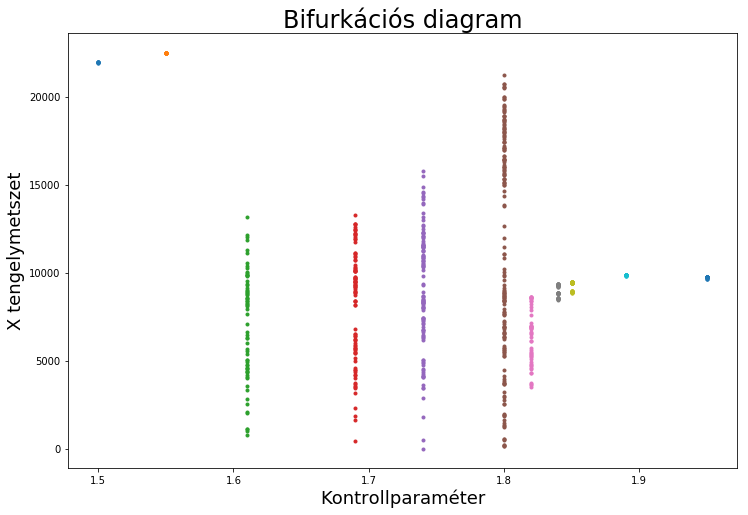

In [19]:
plt.figure(figsize=(12,8))
for i in range(len(metszetek)):
    plt.plot(len(metszetek[i])*[kOhm[i]],metszetek[i],'.')
plt.title('Bifurkációs diagram',fontsize=24)
plt.xlabel('Kontrollparaméter',fontsize=18)
plt.ylabel('X tengelymetszet',fontsize=18)

### 3.3. Attraktor - 4 pont

A kaotikus állapotban mérjük meg a rendszer Poincaré-leképezésbeli attraktorát! Az ábrát csatolja a jegyzőkönyvhöz!

Az attraktor az ábrán a kék ellipszis közepén elhelyezkedő fehér ellipszis.


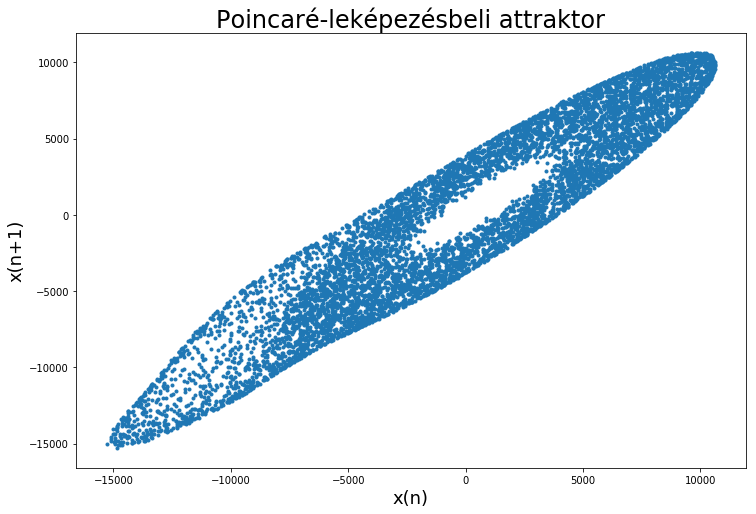

In [20]:
plt.figure(figsize=(12,8))
plt.plot(data_kaotkis[0:8000,0],data_kaotkis[1:8001,0],'.')
plt.title('Poincaré-leképezésbeli attraktor',fontsize=24)
plt.xlabel('x(n)',fontsize=18)
plt.ylabel('x(n+1)',fontsize=18)
print("Az attraktor az ábrán a kék ellipszis közepén elhelyezkedő fehér ellipszis.")

### 3.4. Az információs entrópia viselkedése - 5 pont

A kontroll paraméter lépésenkénti változtatása mellett, vegyük fel a kimenő jelek/jelkeverék csúcsértékeinek eloszlását, és a $H = -\sum\limits^{4096}_{i=1}p_i\log_2 p_i$ szerinti információs entrópiát.

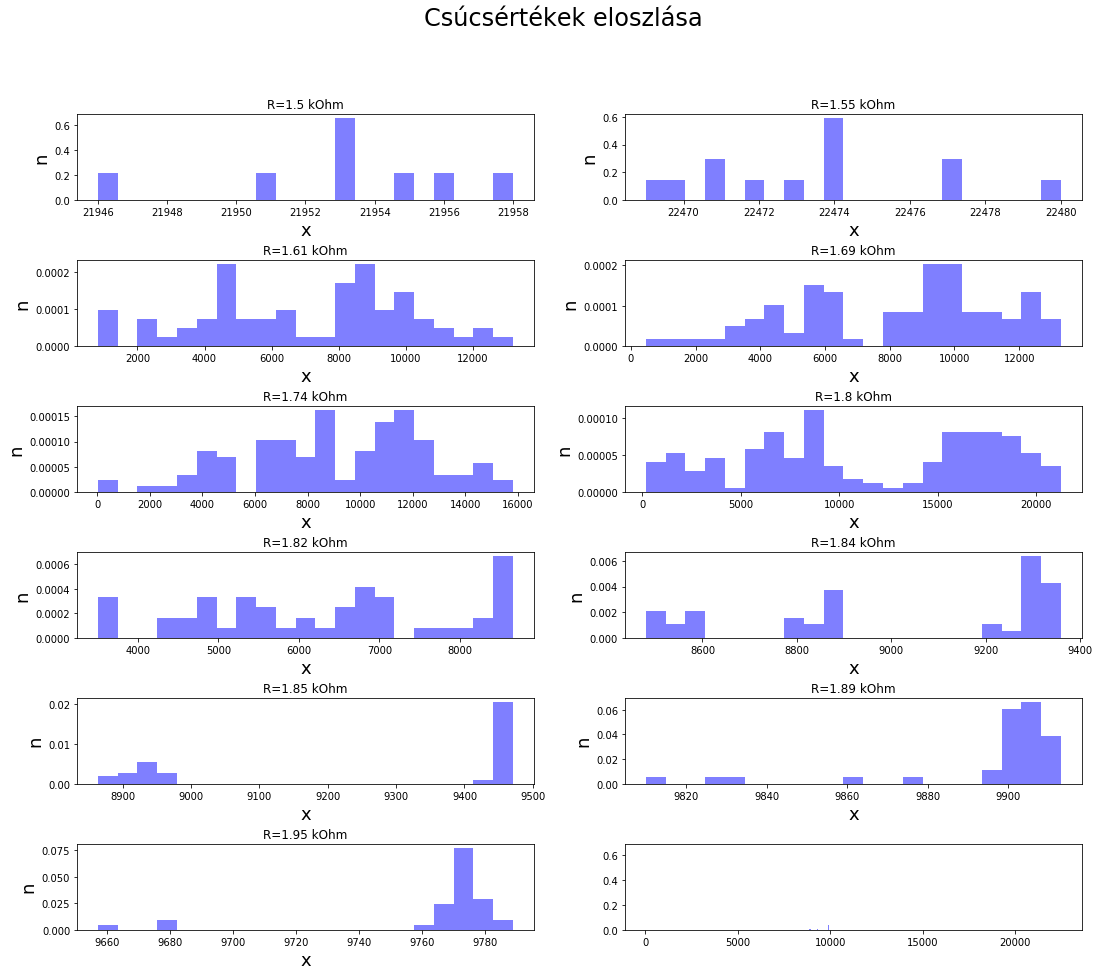

In [43]:
#Ez nagyon lassan fut le num_bins=4096 értékkel!!!!
def histabra(data,kOhm,title):
    f, axs = plt.subplots(len(data)//2+len(data)%2,2,figsize=(18,15))
    f.subplots_adjust(hspace = 0.7, wspace=.2)
    f.suptitle(title,fontsize=24)
    axs = axs.ravel()
    eredmenyek=[]
    for i in range(len(data)):
        matplotlib.tight_layout
        x = data[i]
        num_bins = 21
        n, bins, patches = plt.hist(x, num_bins, density=True, facecolor='blue', alpha=0.5)
        axs[i].hist(x, num_bins, density=True, facecolor='blue', alpha=0.5)
        axs[i].title.set_text('R={} kOhm'.format(kOhm[i]))
        axs[i].set_xlabel("x",fontsize=18)
        axs[i].set_ylabel("n",fontsize=18)
        #axs[i].legend()
        eredmenyek.append([n,bins,patches])
    return eredmenyek
eredmenyek=histabra(metszetek,kOhm,"Csúcsértékek eloszlása")

In [44]:
#Információs entrópia
H_lista=[]
for j in range(len(eredmenyek)):
    H=0
    for i in range(len(eredmenyek[i])):
        p=eredmenyek[i][0]
        H=H-p[i]*math.log2(p[i])
    H_lista.append(H)
print("Az információs entrópia értékei a kontrollparaméterek függvényében:")
for i in range(len(H_lista)):
    print("R={} kOhm : H={}".format(kOhm[i],H_lista[i]))

Az információs entrópia értékei a kontrollparaméterek függvényében:
R=1.5 kOhm : H=0.8870787422432803
R=1.55 kOhm : H=0.8870787422432803
R=1.61 kOhm : H=0.8870787422432803
R=1.69 kOhm : H=0.8870787422432803
R=1.74 kOhm : H=0.8870787422432803
R=1.8 kOhm : H=0.8870787422432803
R=1.82 kOhm : H=0.8870787422432803
R=1.84 kOhm : H=0.8870787422432803
R=1.85 kOhm : H=0.8870787422432803
R=1.89 kOhm : H=0.8870787422432803
R=1.95 kOhm : H=0.8870787422432803


## 4. feladat: A logisztikus leképezés vizsgálata

Írjon rövid `python` programot, ami adott $r$ kontrollparaméter és $x_0$ kezdeti feltétel mellett meghatározza a logisztikus leképezés első $N$ lépését. A logisztikus leképezés iteratív formulája a következő:
$$x_{n+1} = r x_n (1 - x_n).$$

Ábrázolja a kapott értékek eloszlását a bifurkálódott és a kaotikus tartományban!

In [48]:
def logis(r,x0,N):
    x=x0
    lista=[x0]
    for i in range(N):
        x=r*x*(1-x)
        lista.append(x)
    return lista
    

In [49]:
#A jegyzet szerint: bifurkációnál pl r=3, kaotikus tartományban pl r=4
N=1000
x0=0.6
r_bif=3
r_kaot=3.8
R=[r_bif,r_kaot]
bif=logis(r_bif,x0,N)
kaot=logis(r_kaot,x0,N)
data=[bif,kaot]

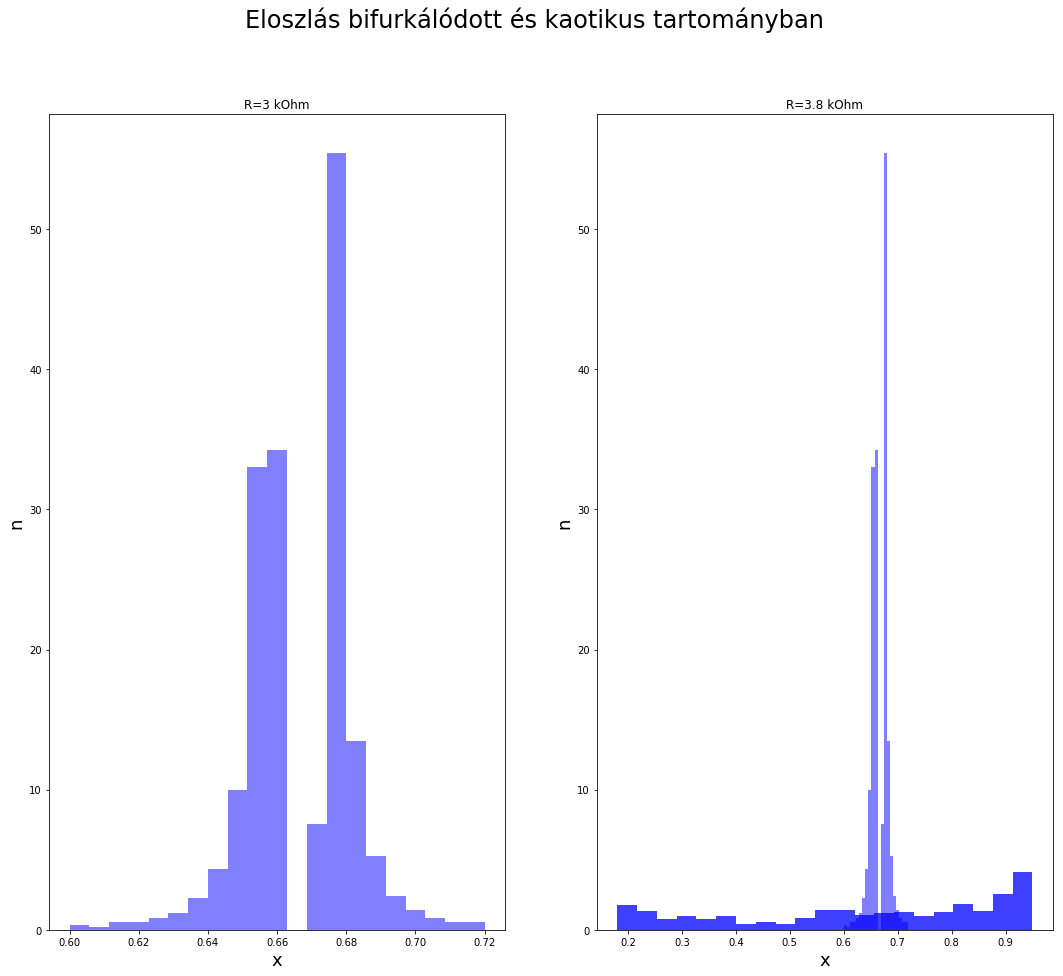

In [50]:
a=histabra(data,R,"Eloszlás bifurkálódott és kaotikus tartományban")
#A kOhm itt nem kell a címeknél